## 1. Подключение библиотек

In [60]:
# Прямая установка библиотеки pymorphy3, stopwords

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eyeelwhy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/eyeelwhy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/eyeelwhy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 581.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [4]:

df = pd.read_csv(r"filmRU.csv")

In [5]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма"
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма"
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма"
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма"
...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма"
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер"
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика"


### Описание набора данных

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    250 non-null    int64  
 1   Название      250 non-null    object 
 2   Год выпуска   250 non-null    int64  
 3   Длительность  250 non-null    object 
 4   Жанр          250 non-null    object 
 5   Рейтинг       250 non-null    float64
 6   Страна        250 non-null    object 
 7   Описание      250 non-null    object 
 8   Жанр_перевод  250 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 17.7+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [16]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

def remove_english(text):
    return re.sub(r'[a-zA-Z]', '', text)

In [18]:
df['Обработанный текст'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(remove_english(text.lower()))))) for text in df['Описание']]

In [20]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...


In [22]:
df['Описание'][0]

'Банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.'

In [24]:
df['Обработанный текст'][0]

'банкир осужденный за уксорицид образует дружбу за четверть века с закаленным осужденным сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание '

In [26]:
russian_stopwords = stopwords.words("russian")

In [28]:
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [30]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которые', 'с','своём','всем','наш', 'свой','каких', 'которых', 'x']) 

In [32]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [34]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [36]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...


In [38]:
df['Токенизированный текст'][0]

'банкир осужденный уксорицид образует дружбу четверть века закаленным осужденным сохраняя невиновность пытаясь оставаться надежды простое сострадание'

In [40]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['Стеммингированный текст'] = stem_list

In [41]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...


In [44]:
df['Стеммингированный текст'][0]

'банкир осужден уксорицид образ дружб четверт век закален осужден сохран невиновн пыт остава надежд прост сострадан'

In [46]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [48]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лемматизированный текст'] = lemm_texts_list

CPU times: user 199 ms, sys: 2.54 ms, total: 202 ms
Wall time: 203 ms


In [49]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...


In [50]:
df['Лемматизированный текст'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [54]:
df['Лемматизированный текст'] = [tokenize(text) for text in df['Лемматизированный текст']]

In [56]:
df.head()

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...


# Облако слов

In [59]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [61]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

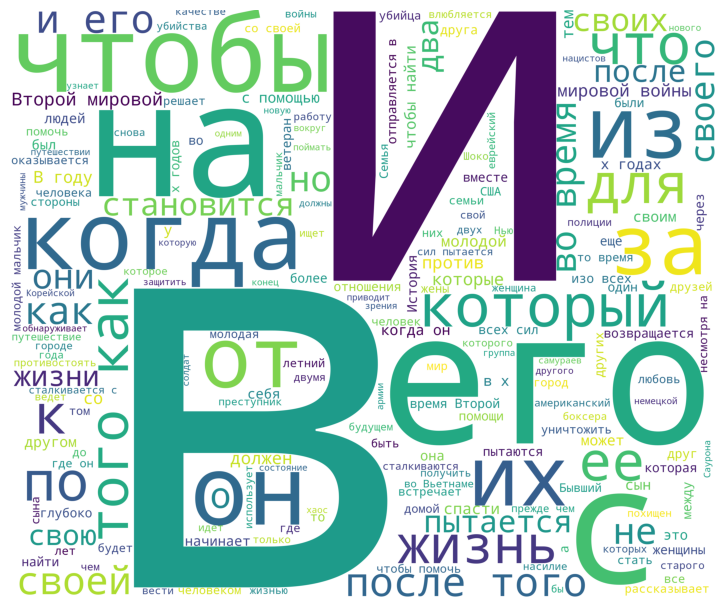

In [62]:
corpus = get_corpus(df['Описание'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

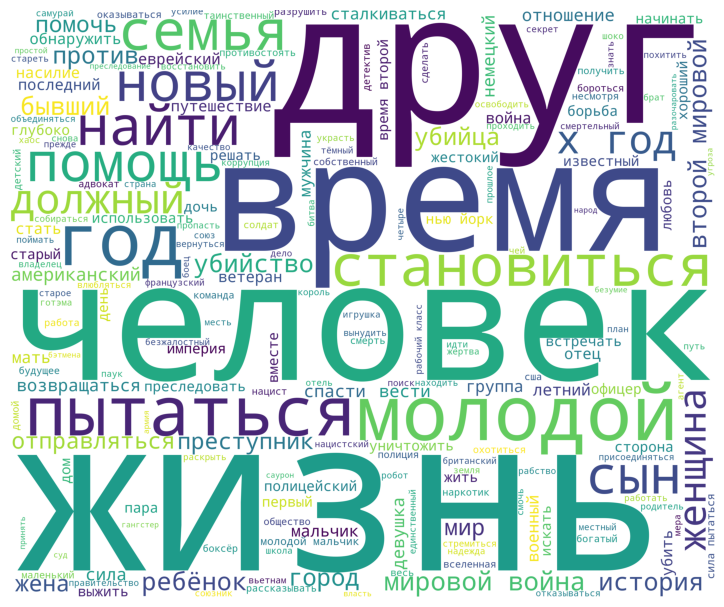

In [63]:
corpus = get_corpus(df['Лемматизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [64]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

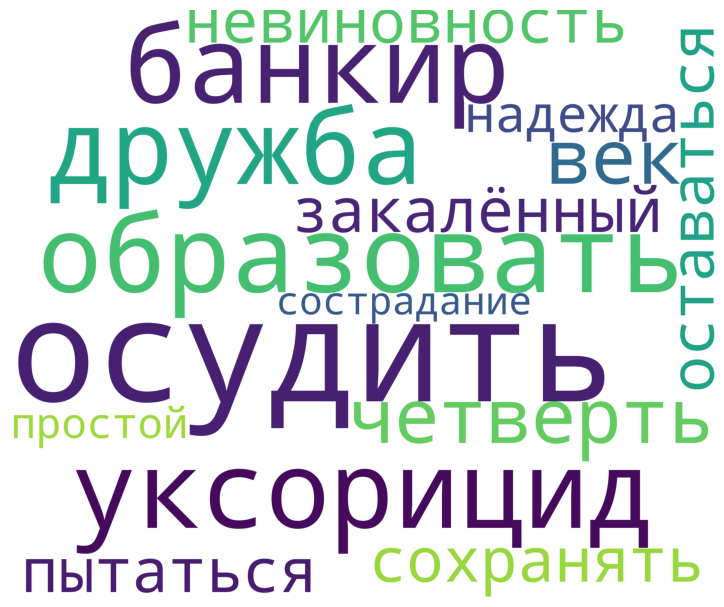

In [65]:
corpus = df['Лемматизированный текст'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

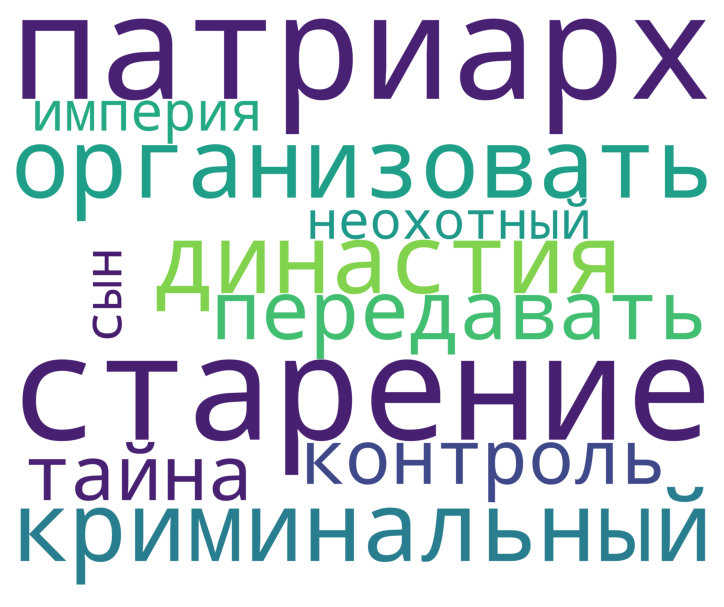

In [66]:
corpus = df['Лемматизированный текст'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [67]:
df['Лемматизированный текст'][1]

'старение патриарх организовать криминальный династия передавать контроль тайна империя неохотный сын'

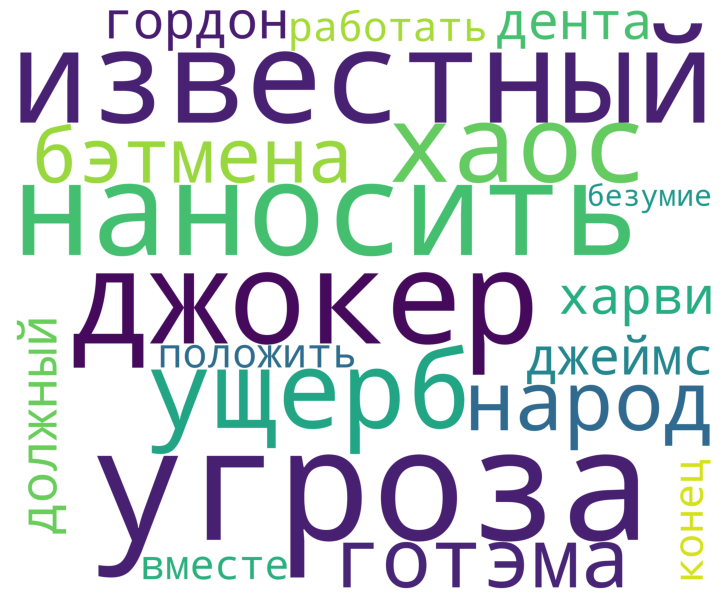

In [68]:
corpus = df['Лемматизированный текст'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [69]:
df['Лемматизированный текст'][2]

'угроза известный джокер наносить ущерб хаос народ готэма бэтмена джеймс гордон харви дента должный работать вместе положить конец безумие'

# Векторизация текстовых данных

Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

1. Прямое кодирование (one-hot encoding) 

Прямое кодирование (one-hot encoding) считается самым простым способом преобразования токенов в тензоры и выполняется следующим образом:

1. каждый токен представляет бинарный вектор (значения 0 или 1);
2. единица ставится тому элементу, который соответствует номеру токена в словаре.

Проблемой прямого кодирования является размерность. 

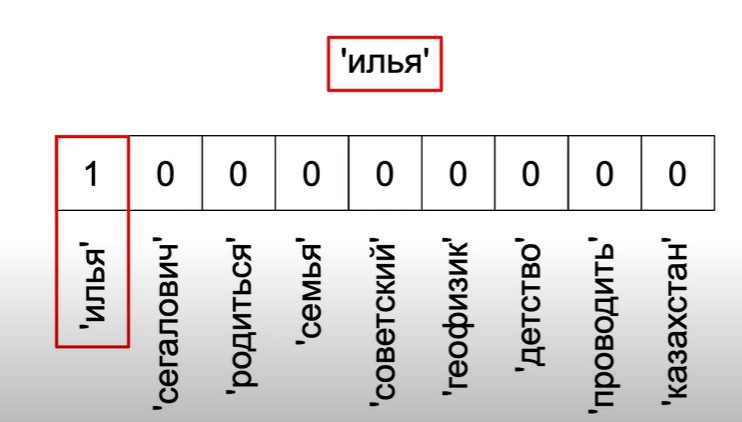

2. Bag of words

В отличие от прямого кодирования, мешок слов (Bag of words) выделяет вектору весь документ, и каждый элемент кодируется 1 по порядку следования слов в словаре.

Bag of words решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз.

__Мешок слов__ - решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. В пакете scikit-learn есть модуль CountVectorizer, который преобразовывает входной текст в матрицу, значениями которой являются количества вхождения данного ключа(слова) в текст. Таким образом, мы получим матрицу, размерность которой будет равна количеству всех слов, умноженных на количество документов. И элементами матрицы будут числа, которые означают, сколько раз всего слово встретилось в тексте.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
df['Лемматизированный текст'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [81]:
vectorizer = CountVectorizer()
vectorizer.fit(df['Лемматизированный текст'])

CountVectorizer()

In [82]:
print(vectorizer.vocabulary_)

{'банкир': 68, 'осудить': 1155, 'уксорицид': 1978, 'образовать': 1080, 'дружба': 467, 'четверть': 2094, 'век': 172, 'закалённый': 519, 'сохранять': 1771, 'невиновность': 1002, 'пытаться': 1512, 'оставаться': 1145, 'надежда': 944, 'простой': 1483, 'сострадание': 1768, 'старение': 1805, 'патриарх': 1216, 'организовать': 1131, 'криминальный': 759, 'династия': 430, 'передавать': 1226, 'контроль': 734, 'тайна': 1871, 'империя': 609, 'неохотный': 1030, 'сын': 1866, 'угроза': 1956, 'известный': 585, 'джокер': 421, 'наносить': 961, 'ущерб': 2008, 'хаос': 2044, 'народ': 970, 'готэма': 355, 'бэтмена': 156, 'джеймс': 412, 'гордон': 348, 'харви': 2046, 'дента': 391, 'должный': 448, 'работать': 1518, 'вместе': 208, 'положить': 1319, 'конец': 725, 'безумие': 83, 'ранний': 1546, 'жизнь': 498, 'карьера': 674, 'вить': 198, 'корлеон': 742, 'год': 340, 'изображаться': 597, 'время': 263, 'майкл': 837, 'расширять': 1561, 'подтягивать': 1296, 'власть': 203, 'отношение': 1173, 'синдикат': 1687, 'семейный': 1

In [83]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Лемматизированный текст'])

In [84]:
count_matrix.shape

(250, 743)

In [85]:
vectorizer.get_feature_names_out()[45000:46000]

array([], dtype=object)

In [87]:
vectorizer.get_feature_names_out()[742]

'японский'

In [88]:
vectorizer.get_feature_names_out()[742]

'японский'

In [89]:
print(count_matrix)

  (0, 374)	1
  (0, 53)	1
  (0, 532)	1
  (0, 328)	1
  (0, 514)	1
  (0, 620)	1
  (1, 423)	1
  (1, 223)	1
  (1, 660)	1
  (2, 686)	1
  (2, 216)	1
  (2, 713)	1
  (2, 337)	1
  (2, 131)	1
  (2, 49)	1
  (2, 154)	1
  (2, 160)	1
  (2, 537)	1
  (2, 73)	1
  (2, 448)	1
  (2, 259)	1
  (2, 22)	1
  (2, 449)	1
  (3, 660)	1
  (3, 179)	1
  :	:
  (247, 342)	1
  (247, 533)	1
  (247, 28)	1
  (247, 605)	1
  (248, 175)	2
  (248, 364)	1
  (248, 12)	1
  (248, 176)	1
  (248, 500)	1
  (248, 214)	1
  (248, 422)	1
  (248, 185)	1
  (248, 565)	1
  (249, 532)	1
  (249, 721)	1
  (249, 644)	1
  (249, 625)	1
  (249, 679)	1
  (249, 534)	1
  (249, 586)	1
  (249, 483)	1
  (249, 680)	1
  (249, 301)	1
  (249, 609)	1
  (249, 194)	1


3. TF-IDF

TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

TF-IDF состоит из двух компонентов: Term Frequency (частотность слова в документе) и Inverse Document Frequency (инверсия частоты документа). Они считаются следующим образом:

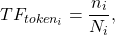

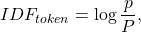

где n_i — сколько раз встречается токен в i-ом документе,  
N_i — общее количество токенов в i-ом документе,   
p — количество документов, в которых встречается токен,   
P — общее количеств документов.   
В конечном счете, TF-IDF – это произведение TF на IDF

 В TF-IDF редкие слова и слова, которые встречаются во всех документах, несут мало информации. 

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [100]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лемматизированный текст'])

CPU times: user 9.79 ms, sys: 938 μs, total: 10.7 ms
Wall time: 11.3 ms


In [101]:
tfidf_matrix.shape

(250, 329)

In [102]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['агент', 'адвокат', 'американский', 'англия', 'анджелес', 'армия',
       'банда', 'бандит', 'безжалостный', 'безумие', 'битва', 'близкий',
       'бог', 'богатый', 'боевой', 'боец', 'боксёр', 'бороться', 'борьба',
       'брат', 'британский', 'бродяга', 'будущее', 'бывший', 'бэтмена',
       'век', 'вернуться', 'вести', 'весь', 'ветеран', 'взять',
       'владелец', 'власть', 'влюбляться', 'вместе', 'военный',
       'возвращаться', 'воин', 'война', 'вокруг', 'волшебный',
       'восстановить', 'время', 'время второй', 'время второй мировой',
       'вселенная', 'вскоре', 'встречать', 'второй', 'второй мировой',
       'второй мировой война', 'выжить', 'выйти', 'вынудить', 'выполнить',
       'высокий', 'вьетнам', 'гангстер', 'глубоко', 'го', 'го век', 'год',
       'город', 'готэма', 'гражданский', 'группа', 'дарт', 'девочка',
       'девушка', 'действие', 'дело', 'день', 'депрессия', 'детектив',
       'детский', 'джон', 'должный', 'дом', 'домой', 'дочь', 'друг',
       'друг

In [103]:
tfidf_vectorizer.get_feature_names_out()[328]

'являться'

In [104]:
tfidf_vectorizer.get_feature_names_out()[328]

'являться'

In [105]:
print(tfidf_matrix)

  (0, 25)	0.5167360839695784
  (0, 235)	0.36095022211117994
  (0, 151)	0.5366385402397056
  (0, 228)	0.5609971780776377
  (1, 103)	0.7624497542326485
  (1, 298)	0.6470474266006888
  (2, 310)	0.2914903013286871
  (2, 101)	0.259749195819409
  (2, 317)	0.2788337195118841
  (2, 155)	0.2914903013286871
  (2, 63)	0.2788337195118841
  (2, 24)	0.2914903013286871
  (2, 76)	0.212860433244441
  (2, 239)	0.2788337195118841
  (2, 34)	0.26849253919571947
  (2, 204)	0.2914903013286871
  (2, 116)	0.26849253919571947
  (2, 9)	0.2914903013286871
  (2, 205)	0.2914903013286871
  (3, 298)	0.4163303272245673
  (3, 89)	0.30936287554122055
  (3, 61)	0.32127792735627775
  (3, 42)	0.33117342397087723
  (3, 32)	0.5505326239056765
  (3, 182)	0.46366168327191193
  :	:
  (246, 253)	0.3185188383504078
  (246, 64)	0.35744153846841736
  (247, 235)	0.24542889438518298
  (247, 89)	0.21435034669046793
  (247, 268)	0.2785543127230686
  (247, 152)	0.2740544830228194
  (247, 307)	0.3134400773965154
  (247, 269)	0.3399140818

### Кластеризация

*Определяем кол-во кластеров для метода K-means*

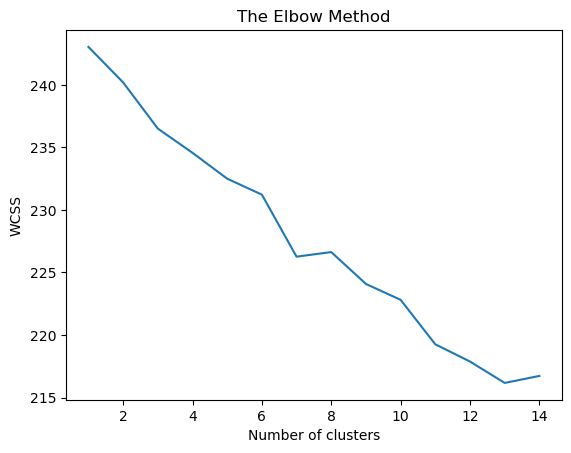

In [108]:
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=28)
kmeans.fit(X)
pred=kmeans.fit_predict(X)

In [110]:
df['Кластер'] = pd.Series(pred)

In [111]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст,Кластер
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...,2
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...,4
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...,2
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...,4
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма",глухая девушка шоко издевается популярной шайе...,глухая девушка шоко издевается популярной шайе...,глух девушк шок издева популярн шай шо продолж...,глухой девушка шоко издеваться популярный шайя...,2
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма,начинающий автор во время движения за гражданс...,начинающий автор время движения гражданские пр...,начина автор врем движен гражданск прав х год ...,начинающий автор время движение гражданский пр...,0
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер",любительский боец ​​собаки супермодель и забро...,любительский боец ​​собаки супермодель заброше...,любительск боец ​​собак супермодел заброшен уб...,любительский боец ​​собака супермодель заброси...,3
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика",самосознательная женщина жонглирует приспособл...,самосознательная женщина жонглирует приспособл...,самосознательн женщин жонглир приспособлен сво...,самосознательный женщина жонглировать приспосо...,3


#### Вывод облака слов и присвоение названия каждому кластеру по данным из облаков

In [113]:
def get_cloudwords_by_claster(claster):
    claster_df = df[df['Кластер'] == claster]
    corpus = get_corpus(claster_df['Лемматизированный текст'].values)
    return WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=2500,
                          height=2000,
                          max_words=200,
                          random_state=42
                         ).generate(str_corpus(corpus))
    

			1 кластер


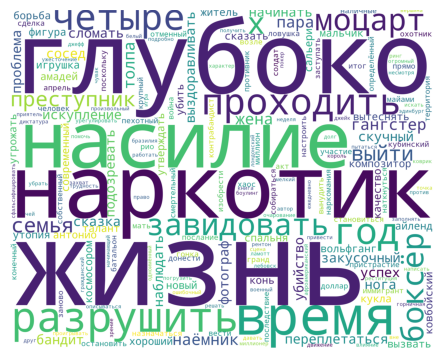

			2 кластер


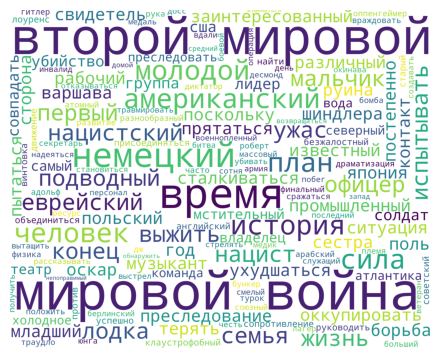

			3 кластер


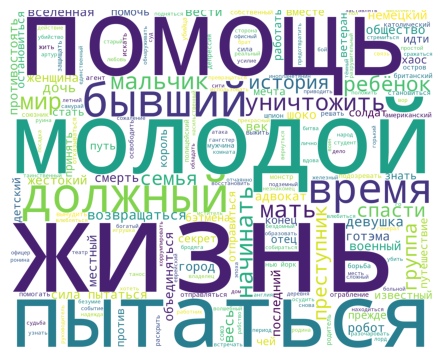

			4 кластер


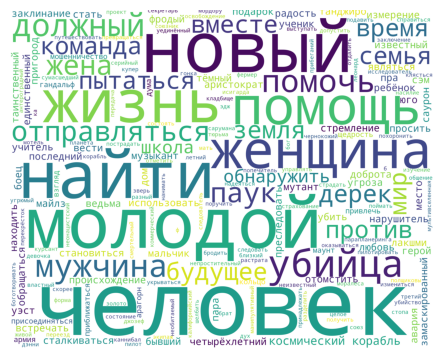

			5 кластер


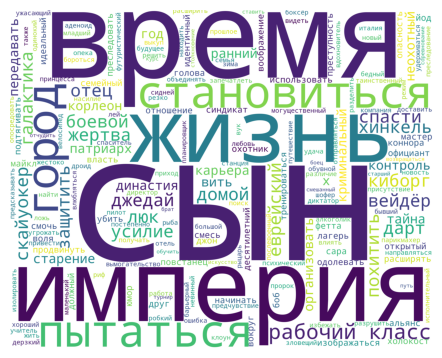

			6 кластер


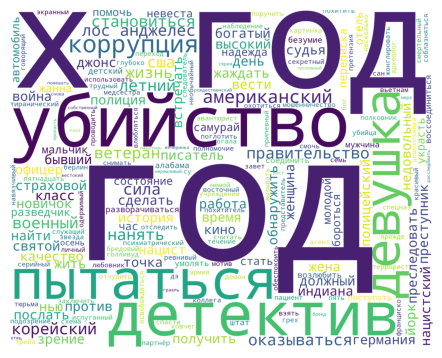

			7 кластер


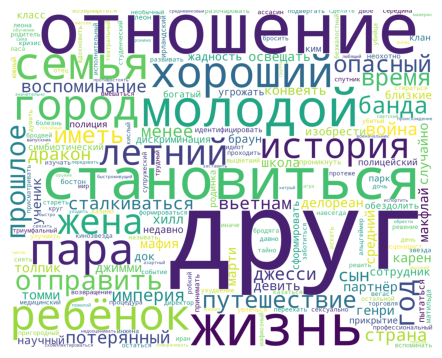

In [114]:
for i in range(df["Кластер"].nunique()):
    print(f"\t\t\t{i+1} кластер")
    cloud = get_cloudwords_by_claster(i)
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [115]:
# Даем название
names = {0: "Преступление", 1: "Человеческая жизнь", 2: "2-ая Мировая Война", 3: "Друзья", 4: "Новый год", 5: "Борьба", 6: "Детектив"}
def give_cluster_name():
    df["Категория кластера"] = df['Кластер'].map(names)
give_cluster_name()

In [116]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст,Кластер,Категория кластера
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...,2,2-ая Мировая Война
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...,4,Новый год
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...,2,2-ая Мировая Война
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...,4,Новый год
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...,2,2-ая Мировая Война
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма",глухая девушка шоко издевается популярной шайе...,глухая девушка шоко издевается популярной шайе...,глух девушк шок издева популярн шай шо продолж...,глухой девушка шоко издеваться популярный шайя...,2,2-ая Мировая Война
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма,начинающий автор во время движения за гражданс...,начинающий автор время движения гражданские пр...,начина автор врем движен гражданск прав х год ...,начинающий автор время движение гражданский пр...,0,Преступление
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер",любительский боец ​​собаки супермодель и забро...,любительский боец ​​собаки супермодель заброше...,любительск боец ​​собак супермодел заброшен уб...,любительский боец ​​собака супермодель заброси...,3,Друзья
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика",самосознательная женщина жонглирует приспособл...,самосознательная женщина жонглирует приспособл...,самосознательн женщин жонглир приспособлен сво...,самосознательный женщина жонглировать приспосо...,3,Друзья


In [117]:
df0 = df[df['Кластер']==0]
df1 = df[df['Кластер']==1]
df2 = df[df['Кластер']==2]
df3 = df[df['Кластер']==3]
df4 = df[df['Кластер']==4]
df5 = df[df['Кластер']==5]
df6 = df[df['Кластер']==6]

In [118]:
pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.1 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [119]:
from sklearn.decomposition import TruncatedSVD

In [120]:
lsa_model = TruncatedSVD(n_components=11, random_state=0)
lsa_model.fit(tfidf_matrix)

TruncatedSVD(n_components=11, random_state=0)

In [121]:
def print_about(df):
    name = df.Название[:3]
    desc = df.Описание[:3]
    films_dict = dict(zip(name, desc))
    for name, desc in films_dict.items():
        print(f"Название фильма: {name}\n\nОписание фильма: {desc}\n")

    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Токенизированный текст'])
    lsa_model.fit(tfidf_matrix)
    
    # вывод топ слов для каждой темы
    for i, topic in enumerate(lsa_model.components_):
        print(f"Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

In [122]:
print_about(df0)

Название фильма: Криминальное чтиво

Описание фильма: Жизнь двух наемников толпы, боксера, гангстера и его жены, и пары закусочных бандитов переплетаются в четырех сказках о насилии и искуплении.

Название фильма: Окно во двор

Описание фильма: Скучный фотограф, выздоравливающий от сломанной ноги, проходит время, наблюдая за своими соседями и начинает подозревать одного из них об убийстве.

Название фильма: Амадей

Описание фильма: Жизнь, успех и проблемы Вольфганг Амадея Моцарта, как сказал Антонио Сальери, современный композитор, который глубоко завидовал таланту Моцарта и утверждал, что убил его.

Тема 0: жизнь, боксера, четырех, насилие, двух, глубоко, наркотиками, моцарта, жизнь боксера, ламотты чье
Тема 1: наркотиков, глубоко, выйти, эдинбурге пытается убрать, погруженный, погруженный сцену, погруженный сцену наркотиков, пытается, пытается убрать, пытается убрать выйти
Тема 2: время, подозревать, сломанной ноги, проходит, время наблюдая, время наблюдая своими, проходит время, про

In [123]:
print_about(df1)

Название фильма: Список Шиндлера

Описание фильма: В оккупированной немецкой Поль году во время Второй мировой войны промышленный Оскар Шиндлер постепенно заинтересован в своей еврейской рабочей силе после того, как нацисты были свидетелем их преследования со стороны нацистов.

Название фильма: Пианист

Описание фильма: Во время Второй мировой войны известный польский музыкант Wladyslaw сталкивается с различной борьбой, поскольку он теряет контакт со своей семьей. Когда ситуация ухудшается, он прячется в руинах Варшавы, чтобы выжить.

Название фильма: Могила светлячков

Описание фильма: Молодой мальчик и его младшая сестра изо всех сил пытаются выжить в Японии во время Второй мировой войны.

Тема 0: время второй, время второй мировой, время, второй мировой войны, выжить, молодой мальчик, молодой, сил, мальчик, японии время второй
Тема 1: лодка, мировой войне, второй мировой войне, войне, испытывает, сил, мальчик, молодой мальчик, молодой, молодая
Тема 2: молодой мальчик, молодой, сил, 

In [124]:
print_about(df2)

Название фильма: Побег из Шоушенка

Описание фильма: Банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.

Название фильма: Тёмный рыцарь

Описание фильма: Когда угроза, известная как Джокер, наносит ущерб и хаос народах Готэма, Бэтмен, Джеймс Гордон и Харви Дент должны работать вместе, чтобы положить конец безумию.

Название фильма: 12 рaзгневанных мужчин

Описание фильма: Присяжные в суде по делу об убийстве в Нью -Йорке разочарованы одним членом, чей скептически осторожность заставляет их более тщательно рассмотреть доказательства, прежде чем принять поспешное приговор.

Тема 0: пытается, своей, сил, своих, сил пытается, изо сил пытается, изо сил, изо, жизнь, время
Тема 1: своих, своей, бывший, жизнь, матерью, возвращается, борьбы, обнаруживает, обучая, обучая своих
Тема 2: своих, борьбы, уничтожить, время, группа, защищает, жертв, солдат, суде, обучая своих


In [125]:
print_about(df3)

Название фильма: Властелин колец: Возвращение короля

Описание фильма: Гандальф и Арагорн ведут мир людей против армии Саурона, чтобы привлечь свой взгляд от Фродо и Сэма, когда они приближаются к Маунт -Дум с одним кольцом.

Название фильма: Хороший, плохой, злой

Описание фильма: Мошенничество на щедрости присоединяется к двум мужчинам в непростительном союзе против третьего в гонке, чтобы найти целое состояние в золоте, похороненное на отдаленном кладбище.

Название фильма: Властелин колец: Две крепости

Описание фильма: В то время как Фродо и Сэм Эдж ближе к Мордору с помощью Shifty Gollum, разделенное общение выступает против нового союзника Саурона, Сарумана и его полщиков Исигарда.

Тема 0: найти, своей, жизни, корабль, отправляется, своей жизни, людей, пару, пра, новую
Тема 1: людей, помощью, против, дерек, уэст, молодых людей, молодых, фродо, саурона, мир
Тема 2: жизни, молодых, молодых людей, пытается, человеком, жестокого, пригородах следующий, пригородах, часа, французских 

In [126]:
print_about(df4)

Название фильма: Крёстный отец

Описание фильма: Старение патриарха организованной криминальной династии передает контроль над его тайной империей его неохотному сыну.

Название фильма: Крёстный отец 2

Описание фильма: Ранняя жизнь и карьера Вито Корлеоне в 1920 -х годах изображаются, в то время как его сын Майкл расширяет и подтягивает свою власть в отношении синдиката по семейной преступности.

Название фильма: Звёздные войны. Эпизод 5: Империя наносит ответный удар

Описание фильма: После того, как Империя одолевает альянс повстанцев, Люк Скайуокер начинает тренироваться с мастером Джедай Йода, в то время как Дарт Вейдер и охотник за головами Боба Фетт преследуют своих друзей через галактику.

Тема 0: сына, своего, своего сына, защитить своего, защитить, сын, еврейский, время, сына опасностей, жертвами холокоста
Тема 1: класса, рабочего, рабочего класса, сын, города, похищен, италии, найти, класса угрожая усилиям, класса угрожая
Тема 2: пытается, спасти, люк, люк скайуокер, галакти

In [127]:
print_about(df5)

Название фильма: Форрест Гамп

Описание фильма: История Соединенных Штатов с 1950 -х годов до 70 -х годов разворачивается с точки зрения мужчины из Алабамы с IQ из 75 лет, который жаждет воссоединиться со своей детской возлюбленной.

Название фильма: Пролетая над гнездом кукушки

Описание фильма: Осенью 1963 года ветеран Корейской войны и преступник умоляет безумие и поступает в психиатрическое учреждение, где он снимает испуганных пациентов против тиранической медсестры.

Название фильма: Семь

Описание фильма: Два детектива, новичок и ветеран, охотятся на серийного убийцы, который использует семь смертельных грехов в качестве своих мотивов.

Тема 0: корейской, ветеран, ветеран корейской, ветеран корейской войны, войны, корейской войны, года, против, пытается, году
Тема 1: свои, получить, получить свои, индиана, джонс, индиана джонс, году, стать, отец пропал, отец пропал вести
Тема 2: годах, годов, лос, коррупции, годах лос, лет, жаждет, убийства, сделать, попал сеть
Тема 3: годов, св

In [128]:
print_about(df6)

Название фильма: Славные парни

Описание фильма: История Генри Хилла и его жизни в мафии, освещая его отношения с его женой Карен и его партнерами по толпике Джимми Конвея и Томми Девито.

Название фильма: Назад в будущее

Описание фильма: Марти МакФлай, 17-летний ученик средней школы, случайно отправил 30 лет в прошлое в путешествии во времени Делореан, изобретенного его близким другом, научным сотрудником Доком Брауном.

Название фильма: Паразиты

Описание фильма: Жадность и дискриминация класса угрожают недавно сформированным симбиотическим отношениям между богатой семьей парка и обездоленным кланом Ким.

Тема 0: друг, друга, друг друга, отношения, другом, проходит, стираться, медицинскую, процедуру навсегда стираться, процедуру навсегда
Тема 1: отношения, становится, отношениям, заботится брошенном ребенке, бродяга, заботится, события, отношениям отношения, события подвергают, события подвергают отношениям
Тема 2: жизнь, друзей, своего, безжалостная инжене, безжалостная инжене вмеш

In [129]:
# Даем название
names = {0: "Приключение", 1: "Борьба", 2: "Драма", 3: "2-я Мировая Война", 4: "Фантастика", 5: "Тюрьма", 6: "Преступление"}
def give_cluster_name():
    df["Категория кластера Моделирование"] = df['Кластер'].map(names)
give_cluster_name()

In [130]:
df

,Unnamed: 0,Название,Год выпуска,Длительность,Жанр,Рейтинг,Страна,Описание,Жанр_перевод,Обработанный текст,Токенизированный текст,Стеммингированный текст,Лемматизированный текст,Кластер,Категория кластера,Категория кластера Моделирование
0,0,Побег из Шоушенка,1994,2h 22m,Drama,9.3,United States,"Банкир, осужденный за уксорицид, образует друж...",Драма,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...,2,2-ая Мировая Война,Драма
1,1,Крёстный отец,1972,2h 55m,"Crime, Drama",9.2,United States,Старение патриарха организованной криминальной...,"Преступление, драма",старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...,4,Новый год,Фантастика
2,2,Тёмный рыцарь,2008,2h 32m,"Action, Crime, Drama",9.0,"United States, United Kingdom","Когда угроза, известная как Джокер, наносит ущ...","Действие, преступность, драма",когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...,2,2-ая Мировая Война,Драма
3,3,Крёстный отец 2,1974,3h 22m,"Crime, Drama",9.0,United States,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,"Преступление, драма",ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...,4,Новый год,Фантастика
4,4,12 рaзгневанных мужчин,1957,1h 36m,"Crime, Drama",9.0,United States,Присяжные в суде по делу об убийстве в Нью -Йо...,"Преступление, драма",присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...,2,2-ая Мировая Война,Драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Форма голоса,2016,2h 10m,"Animation, Drama",8.1,Japan,"Глухая девушка, Шоко, издевается популярной Ша...","Анимация, драма",глухая девушка шоко издевается популярной шайе...,глухая девушка шоко издевается популярной шайе...,глух девушк шок издева популярн шай шо продолж...,глухой девушка шоко издеваться популярный шайя...,2,2-ая Мировая Война,Драма
246,246,Прислуга,2011,2h 26m,Drama,8.1,"United States, India",Начинающий автор во время движения за гражданс...,Драма,начинающий автор во время движения за гражданс...,начинающий автор время движения гражданские пр...,начина автор врем движен гражданск прав х год ...,начинающий автор время движение гражданский пр...,0,Преступление,Приключение
247,247,Сука любовь,2000,2h 34m,"Drama, Thriller",8.0,Mexico,"Любительский боец ​​собаки, супермодель и забр...","Драма, триллер",любительский боец ​​собаки супермодель и забро...,любительский боец ​​собаки супермодель заброше...,любительск боец ​​собак супермодел заброшен уб...,любительский боец ​​собака супермодель заброси...,3,Друзья,2-я Мировая Война
248,248,Ребекка,1940,2h 10m,"Drama, Mystery, Romance",8.1,United States,Самосознательная женщина жонглирует приспособл...,"Драма, тайна, романтика",самосознательная женщина жонглирует приспособл...,самосознательная женщина жонглирует приспособл...,самосознательн женщин жонглир приспособлен сво...,самосознательный женщина жонглировать приспосо...,3,Друзья,2-я Мировая Война
